Names: Cody Hayes (cmh5538),
       Kevin Xiong (gx459),
       Jesus Muñoz-Castañeda (jam26734)




In [ ]:
import numpy as np
import pandas as pd
import sklearn

1.) What is your data set about?

Our data contains information about chess game statistitcs  between two players playing online chess. Each row represents one game and contains information about White and Black.
*   Game ID: Identification string of each game
*   White and Black Rating: ELO rating of both players
*   Opening ECO: What opening strategy was played in that game
*   Opening Ply: How many moves it took before the game moved out of opening-theory
*   White and Black's Centi-pawn Loss: A meaure of advantage in movements between players
*   White and Black's Number of innacuracies: Moves that weren't wrong but could have been better
*   White and Black's Number of Mistakes: Moves that were wrong according to theory
*   White and Black's Number of Blunders: Move that might have 'thrown' the game
*   Winner: Indicator of the final result

2.) What is our research question and what do we expect to learn from our data?

In our project, we have two main goals:

1.   Is is possible to predict a player's rating based solely on their performance of a game?
> We want to be able to predict a players rating based off of their match statistics and predict if they should win or lose. To start out, we used a Linear Regression with the target column being the rating and the selective columns being the testing samples.We a used Decision Trees and Random Forest to predict the rating (then comparing which approach is better and why)

2. Is it possible to predict the result of the game based on statistics of the game?
>We want to know if its possible to know the outcome of the game based solely on the statistics used within the game; for which we used logistic Regression.


3.) What is our expectations about the results?

We expect values like mistakes, blunders to correlate with the player's rating, thus giving us good predicting value. More blunders and innaccuracies should correlate with a lower rating. We also expect to predict the winner of a game based on all the features and the winner column to be the target.

4.) How we want to evaluate our project

We want to see if by using different models, we can get more accurate predictions. If we can get more accurate predictions, then we have achieved our research question as best we could. Each of the models will be evaluated using their respective statistics, such as R2 for LinearRegression or accuracy for BinaryTrees.

We will also explain how we cleaned up our data and what is in the data. And we will explain how we are evaluating our models and show the correctness of each model.

In [ ]:
#Import raw data
raw_data = pd.read_csv('lichess_games_dataset.csv')
raw_data.head()

,Unnamed: 0,Game ID,White Rating,Black Rating,Opening ECO,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Winner
0,0,J7Xvjkte,1441,1559,C20,4,32,2,2,0,87,2,4,1,White
1,1,SSzpi7W1,1258,1567,C46,6,43,0,0,1,6,0,0,0,Black
2,2,NHpcYm3r,1697,1712,C68,7,11,1,0,0,42,1,0,2,White
3,3,Nrzmgzmn,1978,1868,D31,5,21,3,0,0,53,6,0,1,White
4,4,xMuFsnC6,2073,1816,A01,2,35,3,2,0,50,6,3,0,White


_Linear regression_

In [ ]:
#Import variables of interest
imported_var = raw_data[['White Rating', 'Opening Ply', "White's Number of Inaccuracies", "White's Number of Mistakes", "White's Number of Blunders","White Centi-pawn Loss","Black's Number of Inaccuracies", "Black's Number of Mistakes", "Black's Number of Blunders"]]
imported_var.head()

,White Rating,Opening Ply,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,White Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
0,1441,4,2,2,0,32,2,4,1
1,1258,6,0,0,1,43,0,0,0
2,1697,7,1,0,0,11,1,0,2
3,1978,5,3,0,0,21,6,0,1
4,2073,2,3,2,0,35,6,3,0


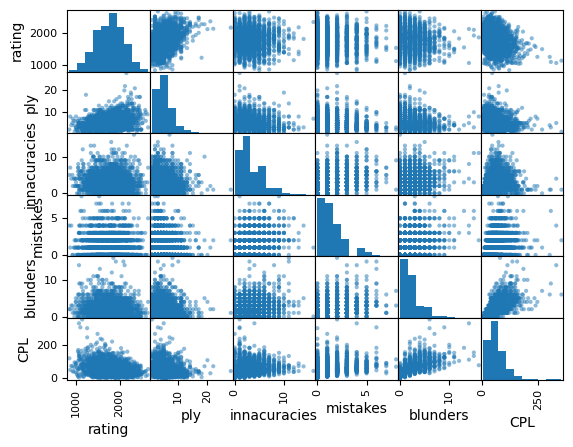

In [ ]:
#Modify/clean variables
from pandas.plotting import scatter_matrix
sample = imported_var.sample(n=2000, random_state = 42).reset_index(drop=True)

clean_data = sample.rename(columns = {'White Rating':'rating', 'Opening Ply':'ply', "White's Number of Inaccuracies":'innacuracies', "White's Number of Mistakes":'mistakes', "White's Number of Blunders":'blunders', "White Centi-pawn Loss":"CPL"})
clean_data = clean_data[['rating', 'ply', 'innacuracies', 'mistakes', 'blunders','CPL']] #Model including all this did 0.1 R2
scatter_matrix(clean_data)
final_df = clean_data[['rating','ply','CPL']]

# Data cleaning process consisted in importing the variabes of interest, sampling, renaming variables for simple use, and simple previsualization.

In [ ]:
#Original model
  #Low R2 Squared
  #No CPL included

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = clean_data['rating']
X = clean_data.loc[:, clean_data.columns != 'rating']

X = X.loc[:, X.columns != 'CPL']

model = LinearRegression()
model = model.fit(X, target)

predictions = model.predict(X)
r2 = r2_score(target, predictions)

print(model.coef_)
print(r2)

[ 30.38970452   3.66897003  -2.10963229 -13.56803575]
0.09264184127949715


# Model using clean_data (which includes innacuracies, mistakes, and blunders) performed rather poorly.

In [ ]:
#Define target and variables
target = final_df['rating']
X = final_df.loc[:, final_df.columns != 'rating']

array([[<Axes: xlabel='ply', ylabel='ply'>,
        <Axes: xlabel='CPL', ylabel='ply'>],
       [<Axes: xlabel='ply', ylabel='CPL'>,
        <Axes: xlabel='CPL', ylabel='CPL'>]], dtype=object)

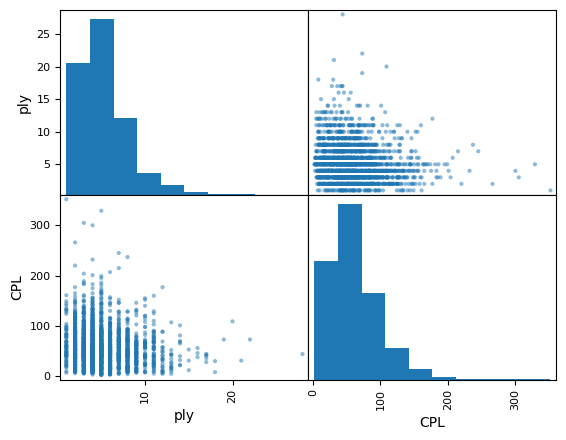

In [ ]:
#Data visualization (Confirm independency of each variable)
from pandas.plotting import scatter_matrix

scatter_matrix(X)

In [ ]:
#Fit data to GLM
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X, target)

In [ ]:
#Final model
  #Improved R2
  #Simple (2 predicting features)
  #Still not great results
#Predict data from linear model and compare with results
from sklearn.metrics import r2_score

predictions = model.predict(X)
r2 = r2_score(target, predictions)

print(model.coef_)
print(r2)

[27.40160986 -1.95408736]
0.14052835802545238


# While still not great, the model proved to be better with lower complexity.

# More tries with different variable combinations were done, but they proved to give lower results than this.

# A new approach was taken changing the variable to be categorical.

_Decision tree_

Average chess rating: 1775.4105
Chess rating standard deviation: 314.9844100571321
Upper bound for lower players:  1460
Higher bound for higher players: 2090


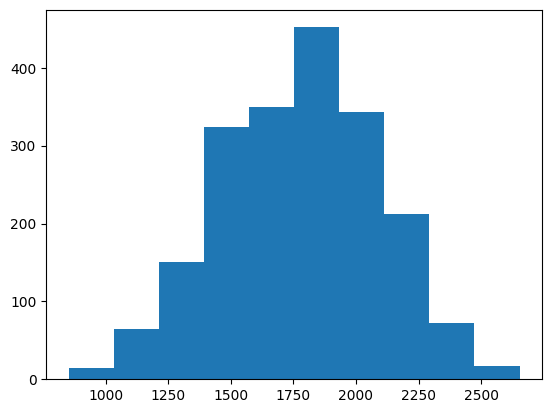

In [ ]:
import matplotlib.pyplot as plt

#Histogram visualization for rating values
plt.hist(clean_data['rating'])

#Rating information to categorize rating values
print(f"Average chess rating: {clean_data['rating'].mean()}")
print(f"Chess rating standard deviation: {clean_data['rating'].std()}")
print(f"Upper bound for lower players:  {round(clean_data['rating'].mean() - clean_data['rating'].std())}")
print(f"Higher bound for higher players: {round(clean_data['rating'].mean() + clean_data['rating'].std())}")

In [ ]:
#Function to assign rating category based on rating value
def categorization(a):
  if a > 2089:
    return 'High'
  elif a > 1460:
    return 'Intermediate'
  else:
    return 'Low'

#Preparing target column for Decision Tree implementation
categorical_target = clean_data.copy()
categorical_target['rating'] = categorical_target['rating'].apply(categorization)

#Clean dataset
categorical_target = categorical_target.sample(n=2000, random_state=42).reset_index(drop=True)
categorical_target

,rating,ply,innacuracies,mistakes,blunders,CPL
0,High,8,5,5,1,62
1,Low,6,6,5,5,74
2,Intermediate,5,0,0,0,4
3,Low,6,0,0,0,5
4,Intermediate,5,6,3,1,36
...,...,...,...,...,...,...
1995,Intermediate,4,3,3,2,49
1996,High,6,3,1,1,83
1997,Low,4,2,1,4,91
1998,Low,6,1,1,1,53


In [ ]:
from sklearn.model_selection import train_test_split

#Splitting data into test cases
target = categorical_target['rating']
X = categorical_target.loc[:, categorical_target.columns != 'rating']

X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.2, random_state=123)

[Text(0.5, 0.875, 'innacuracies <= 8.5\nlog_loss = 1.227\nsamples = 1600\nvalue = [266, 1086, 248]'),
 Text(0.25, 0.625, 'ply <= 73.5\nlog_loss = 1.198\nsamples = 1388\nvalue = [188, 959, 241]'),
 Text(0.125, 0.375, 'innacuracies <= 4.5\nlog_loss = 1.173\nsamples = 954\nvalue = [159, 670, 125]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'ply <= 119.5\nlog_loss = 1.16\nsamples = 434\nvalue = [29, 289, 116]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'innacuracies <= 13.5\nlog_loss = 1.136\nsamples = 212\nvalue = [78, 127, 7]'),
 Text(0.625, 0.375, 'ply <= 26.5\nlog_loss = 1.089\nsamples = 188\nvalue = [60, 122, 6]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'innacuracies <= 17.5\nlog_loss = 0.974\nsamples = 24\nvalue = [18, 5, 1]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

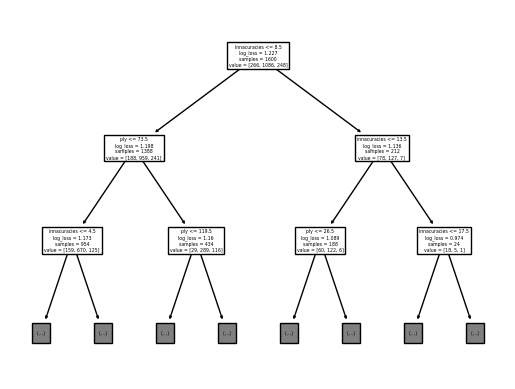

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Fitting data into DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion = 'log_loss')
tree_clf = tree_clf.fit(X_train[['CPL','ply']], target_train) #Using all the variables in X_train gave a lower accuracy score

#Plotting first two levels of Decision Tree
tree.plot_tree(tree_clf, feature_names=X_train.columns, max_depth = 2)

In [ ]:
def get_accuracy(s_y: np.ndarray, s_y_hat: np.ndarray) -> float:
    """Compute the accuracy of the predicted values s_y_hat, against
    the true values s_y."""
    correct = 0
    for i in range(len(s_y)):
      if s_y[i] == s_y_hat[i]:
        correct += 1

    acc = correct / len(s_y)

    return acc

In [ ]:
#Accuracy check for Decision Tree implementation
pred = tree_clf.predict(X_test[['CPL','ply']])
acc = get_accuracy(target_test.array, pred)
print(acc)

0.535


_Random forest_

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_R = RandomForestClassifier()
RF_R = RF_R.fit(X_train[['CPL','ply']], target_train)

predict = RF_R.predict(X_test[['CPL','ply']])

acc = get_accuracy(target_test.array, predict)
print(acc)
#print(predict)

0.56


# Both implementations gave a fairly better results than Linear Regression, and were higher than our expected baseline (0.33), yet they are still fairly incompetent at classifying a player's rating.

# Results were tested using different criterions, max_depth, and other variables, but the results remained fairly stable.

# We dediced then that it is not possible to accurately predict a player's rating, either quantitatively or qualitatively, solely based on their performance in a game measured by different variables.

LOGISTIC REGRESSION IMPLEMENTATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Seperate/clean data for White and Black players
lr_var = raw_data[['White Rating','Black Rating','Opening Ply','White Centi-pawn Loss',"White's Number of Inaccuracies","White's Number of Mistakes","White's Number of Blunders","Black Centi-pawn Loss","Black's Number of Inaccuracies","Black's Number of Mistakes","Black's Number of Blunders","Winner"]]
sample_ = lr_var.sample(n=2000).reset_index(drop=True)
sample_

,White Rating,Black Rating,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Winner
0,1900,1914,4,41,4,1,1,19,3,1,0,Black
1,2057,2044,2,24,1,0,0,57,4,3,0,White
2,1603,1574,3,96,2,2,3,35,3,1,0,Black
3,2281,1951,6,10,2,0,0,36,4,0,1,White
4,2166,1702,10,49,2,0,1,8,0,0,0,Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2115,1927,7,46,6,4,1,42,10,1,0,Black
1996,1652,1827,6,99,2,0,5,50,2,1,2,Black
1997,1475,1420,1,25,2,0,0,49,6,1,1,White
1998,1461,1403,2,138,4,1,4,188,2,1,5,White


BINOMIAL LOGISTIC REGRESSION

In [ ]:
#Filters out rows with Draw in the winner column to have a binomial regression
index_winner = sample_[ (sample_['Winner'] == "Draw")].index
sample_.drop(index_winner , inplace=True)
sample_

,White Rating,Black Rating,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders,Winner
0,1900,1914,4,41,4,1,1,19,3,1,0,Black
1,2057,2044,2,24,1,0,0,57,4,3,0,White
2,1603,1574,3,96,2,2,3,35,3,1,0,Black
3,2281,1951,6,10,2,0,0,36,4,0,1,White
4,2166,1702,10,49,2,0,1,8,0,0,0,Black
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2115,1927,7,46,6,4,1,42,10,1,0,Black
1996,1652,1827,6,99,2,0,5,50,2,1,2,Black
1997,1475,1420,1,25,2,0,0,49,6,1,1,White
1998,1461,1403,2,138,4,1,4,188,2,1,5,White


array([[<Axes: xlabel='White Rating', ylabel='White Rating'>,
        <Axes: xlabel='Black Rating', ylabel='White Rating'>,
        <Axes: xlabel='Opening Ply', ylabel='White Rating'>,
        <Axes: xlabel='White Centi-pawn Loss', ylabel='White Rating'>,
        <Axes: xlabel="White's Number of Inaccuracies", ylabel='White Rating'>,
        <Axes: xlabel="White's Number of Mistakes", ylabel='White Rating'>,
        <Axes: xlabel="White's Number of Blunders", ylabel='White Rating'>,
        <Axes: xlabel='Black Centi-pawn Loss', ylabel='White Rating'>,
        <Axes: xlabel="Black's Number of Inaccuracies", ylabel='White Rating'>,
        <Axes: xlabel="Black's Number of Mistakes", ylabel='White Rating'>,
        <Axes: xlabel="Black's Number of Blunders", ylabel='White Rating'>],
       [<Axes: xlabel='White Rating', ylabel='Black Rating'>,
        <Axes: xlabel='Black Rating', ylabel='Black Rating'>,
        <Axes: xlabel='Opening Ply', ylabel='Black Rating'>,
        <Axes: xlabel='

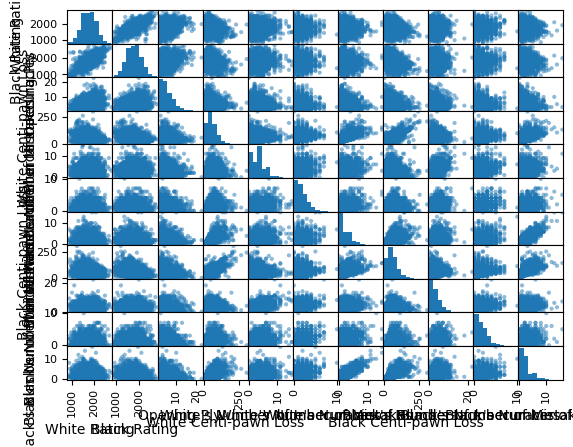

In [ ]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

#Create independent and target variables
X = sample_[['White Rating','Black Rating','Opening Ply','White Centi-pawn Loss',"White's Number of Inaccuracies","White's Number of Mistakes","White's Number of Blunders","Black Centi-pawn Loss","Black's Number of Inaccuracies","Black's Number of Mistakes","Black's Number of Blunders"]].to_numpy()
Y = sample_["Winner"].to_numpy()

#Split variables into test cases
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
X_test



In [ ]:
#Fitting a logistic regression to the train sets
model = LogisticRegression( fit_intercept=True, max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
#Calculates the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9609375

In [ ]:
from sklearn.metrics import classification_report
#Prints the classification report for binomial regression

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Black       0.96      0.96      0.96       179
       White       0.97      0.96      0.96       205

    accuracy                           0.96       384
   macro avg       0.96      0.96      0.96       384
weighted avg       0.96      0.96      0.96       384



(384,)


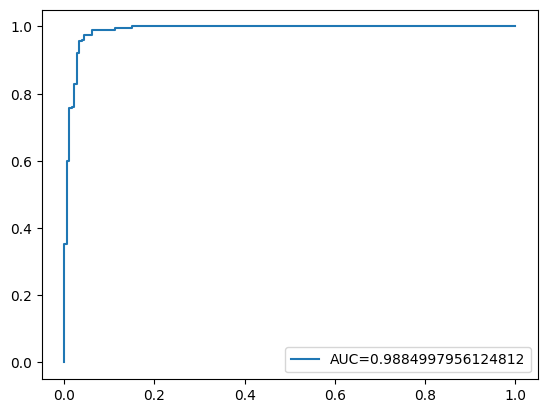

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
#Based on reference from https://www.statology.org/logistic-regression-python/

y_pred_proba = model.predict_proba(X_test)[::,1]
y_test[y_test == 'Black'] = 0
y_test[y_test == 'White'] = 1
y_test = y_test.astype(int)
print(y_test.shape)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

MULTINOMIAL LOGISTIC REGRESSION

In [ ]:
#Create independent and target variables for the Black player
X = lr_var[['White Rating','Black Rating','Opening Ply','White Centi-pawn Loss',"White's Number of Inaccuracies","White's Number of Mistakes","White's Number of Blunders","Black Centi-pawn Loss","Black's Number of Inaccuracies","Black's Number of Mistakes","Black's Number of Blunders"]].to_numpy()
Y = lr_var["Winner"].to_numpy()

#Split variables into test cases
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
X_test

array([[1979, 1988,    5, ...,    3,    0,    0],
       [1921, 1960,    5, ...,    3,    2,    0],
       [1818, 1828,    7, ...,    5,    0,    2],
       ...,
       [1457, 1517,   10, ...,    2,    0,    0],
       [1494, 1466,    5, ...,    3,    2,    3],
       [1322, 1227,    4, ...,    2,    0,    3]])

In [ ]:
#Fitting a logistic regression to the train sets
model = LogisticRegression( fit_intercept=True, multi_class='multinomial', max_iter=2000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [ ]:
##Calculates the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9222103004291845

In [ ]:
from sklearn.metrics import classification_report



print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Black       0.92      0.97      0.94      1706
        Draw       0.71      0.06      0.11       173
       White       0.93      0.96      0.94      1849

    accuracy                           0.92      3728
   macro avg       0.85      0.66      0.66      3728
weighted avg       0.91      0.92      0.90      3728



SVM IMPLEMENTATION

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.9165772532188842


In [ ]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

       Black       0.91      0.96      0.94      1706
        Draw       1.00      0.00      0.00       173
       White       0.92      0.96      0.94      1849

    accuracy                           0.92      3728
   macro avg       0.94      0.64      0.63      3728
weighted avg       0.92      0.92      0.89      3728



#Logistic regression is the best predictor model for determining which player is likely to win the match.

#It is reasonable for the binomial regression to be more accurate than the multinomial, since the model has two options to predict whether a player wins or loses while the multinomial model has three options.

#The trend seems to be the more target variables there are, the more likely the model is not going to be as accurate and a different method would be needed in that case like SVM.

#Since we found that the logistic regression was pretty accurate, I similar results from SVM.

#SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables (which is what we have with this dataset).

#The methods provide similar results but in this case logistic regression is the better model for this dataset.